# Predicting Stock Prices with Different Machine Learning Models

In [1]:
%matplotlib inline

In [2]:
#standard imports for calculations, dataframes work and plotting - check this again
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#holidays handling
from pandas.tseries.offsets import BDay

In [3]:
#Reading our data
microsoft_prices = pd.read_csv("microsoft_stock_prices.csv")

Below take a look at the data

In [4]:
microsoft_prices.head()
#explain columns, terminology, time series definition, stocks for sure

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,59.3125,56.00000,58.68750,58.28125,53228400.0,37.623280
1,2000-01-04,58.5625,56.12500,56.78125,56.31250,54119000.0,36.352352
2,2000-01-05,58.1875,54.68750,55.56250,56.90625,64059600.0,36.735657
3,2000-01-06,56.9375,54.18750,56.09375,55.00000,54976600.0,35.505081
4,2000-01-07,56.1250,53.65625,54.31250,55.71875,62013600.0,35.969063


In [5]:
microsoft_prices.shape

(4981, 7)

In [6]:
#Since the date columns is object, we will transform it into a datetime format, before we proceed further
microsoft_prices.Date = pd.to_datetime(microsoft_prices.Date)

In [7]:
#since we don't know if only business days are included we will have to make another check
isBusinessDay = BDay().onOffset
microsoft_business_days_check = pd.to_datetime(microsoft_prices.Date).map(isBusinessDay)
microsoft_business_days_check.shape

(4981,)

In [8]:
microsoft_business_days_check.unique()

array([ True])

In [9]:
microsoft_prices = microsoft_prices.set_index("Date")

In [10]:
#The time series we have downloaded do not include holidays. Years have different count of working days 
#but this is normal because holiday days are on different day every year
microsoft_prices.index.year.value_counts()

2008    253
2000    252
2005    252
2011    252
2004    252
2003    252
2014    252
2010    252
2016    252
2002    252
2015    252
2013    252
2009    252
2017    251
2006    251
2018    251
2007    251
2012    250
2001    248
2019    202
Name: Date, dtype: int64

In [11]:
#microsoft_prices.loc["2010"].count()

In [12]:
microsoft_prices = microsoft_prices.rename(columns = {"Adj Close": "Adj_close"})

In [13]:
microsoft_prices = microsoft_prices.round({"High":2, "Low":2, "Open":2, "Close":2, "Adj_close":2})

In [14]:
microsoft_prices.head()

,High,Low,Open,Close,Volume,Adj_close
Date,,,,,,
2000-01-03,59.31,56.00,58.69,58.28,53228400.0,37.62
2000-01-04,58.56,56.12,56.78,56.31,54119000.0,36.35
2000-01-05,58.19,54.69,55.56,56.91,64059600.0,36.74
2000-01-06,56.94,54.19,56.09,55.00,54976600.0,35.51
2000-01-07,56.12,53.66,54.31,55.72,62013600.0,35.97


In [15]:
microsoft_prices.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4981 entries, 2000-01-03 to 2019-10-18
Data columns (total 6 columns):
High         4981 non-null float64
Low          4981 non-null float64
Open         4981 non-null float64
Close        4981 non-null float64
Volume       4981 non-null float64
Adj_close    4981 non-null float64
dtypes: float64(6)
memory usage: 272.4 KB


C:\Users\Az\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


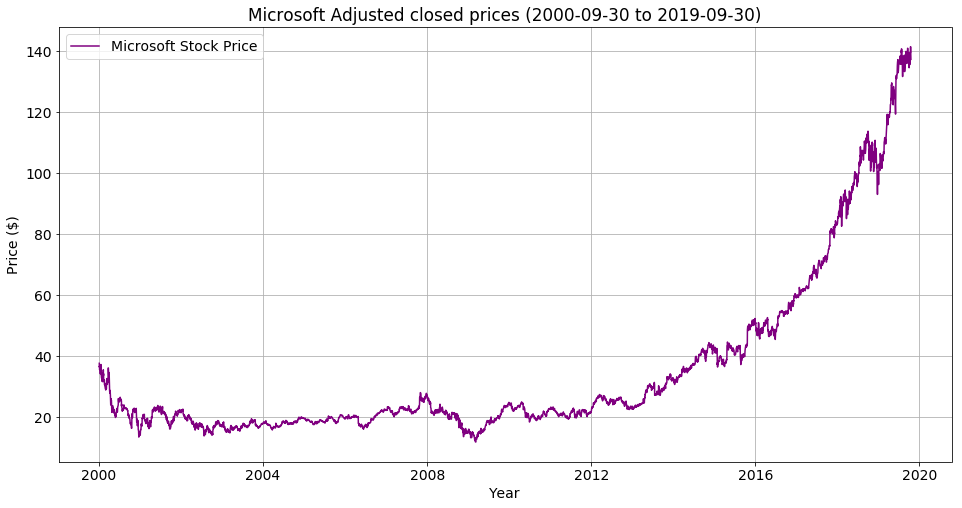

In [16]:
plt.figure(figsize = (16,8), linewidth=3, frameon = False)
plt.rcParams.update({'font.size': 14})
plt.plot(microsoft_prices["Adj_close"], color = "purple")
plt.title("Microsoft Adjusted closed prices (2000-09-30 to 2019-09-30)")
plt.xlabel('Year')
plt.ylabel("Price ($)")
plt.legend(["Microsoft Stock Price"], loc = "best")
plt.grid(True)
plt.show()

In [17]:
#microsoft_prices.describe().T